In [89]:
#importing
import os
import numpy as np
import pandas as pd
from scipy.stats import triang
from scipy.stats import norm
from scipy.stats import poisson
import numpy_financial as npf
print("all libraries are loaded!")

all libraries are loaded!


In [90]:
df = pd.read_csv("q1_input_cost.csv")
df

,year,Construction Cost,Labor - Annual,O&M
0,0,0,0,0
1,1,-50000000,-473500,0
2,2,-50000000,-473500,-790000
3,3,-50000000,-473500,-1580000
4,4,0,-473500,-2370000
5,5,0,-473500,-2370000
6,6,0,-473500,-2370000
7,7,0,-473500,-2370000
8,8,0,-473500,-2370000
9,9,0,-473500,-2370000


In [91]:
fee_MF_f = 10.00 #USD/spot
spc_MF_min = 0
spc_MF_max = 5000*0.80
spc_MF = np.mean([spc_MF_min,spc_MF_max]) #Spot per Cycle with MIN & MAX
cpd_MF_min = 0
cpd_MF_max = 3
cpd_MF = np.mean([cpd_MF_min,cpd_MF_max]) #cycle per day
py_MF = 261 #How many working days are there in a year
B_MF = fee_MF_f*spc_MF*cpd_MF*py_MF
fee_EV_f = 7.50 #USD/spot
spc_EV_min = 0
spc_EV_max = 5000*0.80
spc_EV = np.mean([spc_EV_min,spc_EV_max]) #Spot per Cycle with MIN & MAX
cpe_EV_min = 0
cpe_EV_max = 2
cpe_EV = np.mean([cpe_EV_min,cpe_EV_max]) #cycle per event
py_EV = 135 #How many events are there in a year
B_EV = fee_EV_f*spc_EV*cpe_EV*py_EV
print("B_MF is "+"${0:,.2f}".format(B_MF))
print("B_EV is "+"${0:,.2f}".format(B_EV))
B_MF0 = B_MF
B_EV0 = B_EV

B_MF is $7,830,000.00
B_EV is $2,025,000.00


In [92]:
df["B_MF"]=B_MF
df["B_EV"]=B_EV
df.at[0,"B_MF"]=0
df.at[0,"B_EV"]=0
df.at[1,"B_MF"]=0
df.at[1,"B_EV"]=0
df.at[2,"B_MF"]=B_MF*1/3
df.at[2,"B_EV"]=B_EV*1/3
df.at[3,"B_MF"]=B_MF*2/3
df.at[3,"B_EV"]=B_EV*2/3
df["Net"] = df.drop('year', axis=1).sum(axis=1)
df.style.format('${0:,.2f}')

,year,Construction Cost,Labor - Annual,O&M,B_MF,B_EV,Net
0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
1,$1.00,"$-50,000,000.00","$-473,500.00",$0.00,$0.00,$0.00,"$-50,473,500.00"
2,$2.00,"$-50,000,000.00","$-473,500.00","$-790,000.00","$2,610,000.00","$675,000.00","$-47,978,500.00"
3,$3.00,"$-50,000,000.00","$-473,500.00","$-1,580,000.00","$5,220,000.00","$1,350,000.00","$-45,483,500.00"
4,$4.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
5,$5.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
6,$6.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
7,$7.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
8,$8.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
9,$9.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"


In [93]:
net_val = df["Net"].to_numpy()
rate_i = 0.07
#Printing NPV Values
print("NPV value with rate ", rate_i, " is: ", "${0:,.2f}".format(npf.npv(rate_i, net_val)))

NPV value with rate  0.07  is:  $-95,360,409.81


In [94]:
column_names = ["iteration","fee_MF","fee_EV", "NPV"]
df_sim = pd.DataFrame(columns = column_names)
for iter in range(1000): #simulation with ... iteration
  #print(iter)
  fee_MF_min = fee_MF_f
  fee_MF_max = fee_MF_f*10
  fee_MF_sd = (fee_MF_max-fee_MF_min)/4
  fee_MF = norm.rvs(loc=np.mean([fee_MF_min,fee_MF_max]),scale=fee_MF_sd)
  spc_MF_mean = np.mean([spc_MF_min,spc_MF_max])
  spc_MF_sd = (spc_MF_max-spc_MF_min)/4
  #spc_MF = norm.rvs(loc=spc_MF_mean,scale=spc_MF_sd) #Spot per Cycle
  cpd_MF_mean = np.mean([cpd_MF_min,cpd_MF_max])
  cpd_MF_sd = (cpd_MF_max-cpd_MF_min)/4
  #cpd_MF = norm.rvs(loc=cpd_MF_mean,scale=cpd_MF_sd) #cycle per day
  B_MF = fee_MF*spc_MF*cpd_MF*py_MF

  fee_EV_min = fee_EV_f
  fee_EV_max = fee_EV_f*10
  fee_EV_sd = (fee_EV_max-fee_EV_min)/4
  fee_EV = norm.rvs(loc=np.mean([fee_EV_min,fee_EV_max]),scale=fee_EV_sd)
  spc_EV_mean = np.mean([spc_EV_min,spc_EV_max])
  spc_EV_sd = (spc_EV_max-spc_EV_min)/4
  #spc_EV = norm.rvs(loc=spc_EV_mean,scale=spc_EV_sd) #Spot per Cycle
  cpe_EV_mean = np.mean([cpe_EV_min,cpe_EV_max])
  cpe_EV_sd = (cpe_EV_max-cpe_EV_min)/4
  #cpe_EV = norm.rvs(loc=cpe_EV_mean,scale=cpe_EV_sd) #cycle per event
  B_EV = fee_EV*spc_EV*cpe_EV*py_EV
  df_temp = df
  df_temp["B_MF"]=B_MF
  df_temp["B_EV"]=B_EV
  df_temp.at[0,"B_MF"]=0
  df_temp.at[0,"B_EV"]=0
  df_temp.at[1,"B_MF"]=0
  df_temp.at[1,"B_EV"]=0
  df_temp.at[2,"B_MF"]=B_MF*1/3
  df_temp.at[2,"B_EV"]=B_EV*1/3
  df_temp.at[3,"B_MF"]=B_MF*2/3
  df_temp.at[3,"B_EV"]=B_EV*2/3
  df_temp["Net"] = df_temp.drop('year', axis=1).sum(axis=1)
  net_val = df_temp["Net"].to_numpy()
  NPV = npf.npv(rate_i, net_val)
  #keep track
  df_sim.at[iter,"iteration"] = iter
  df_sim.at[iter,"NPV"] = NPV
  df_sim.at[iter,"fee_MF"] = fee_MF
  df_sim.at[iter,"fee_EV"] = fee_EV
print(df_sim.describe())
print(df_sim.max())
print(df_sim.min())

        iteration       fee_MF       fee_EV           NPV
count        1000  1000.000000  1000.000000  1.000000e+03
unique       1000  1000.000000  1000.000000  1.000000e+03
top             0    -0.431848    -0.540258  7.204645e+09
freq            1     1.000000     1.000000  1.000000e+00
iteration                   999
fee_MF               134.502892
fee_EV                91.932976
NPV          139291830584.90625
dtype: object
iteration                   0
fee_MF              -9.266732
fee_EV             -11.571444
NPV          239507347.552086
dtype: object


In [95]:
df_sim.head().style.format('${0:,.2f}')

,iteration,fee_MF,fee_EV,NPV
0,$0.00,$97.72,$57.52,"$239,507,347.55"
1,$1.00,$82.99,$51.93,"$506,091,058.89"
2,$2.00,$69.92,$4.27,"$651,765,100.22"
3,$3.00,$71.72,$18.11,"$824,371,627.58"
4,$4.00,$64.79,$50.33,"$1,014,107,695.86"


In [96]:
df_sim = df_sim[df_sim['NPV']>=0]
#df_sim = df_sim[df_sim['fee_MF']>=fee_MF_f]
df_sim = df_sim[df_sim['fee_MF']>=0]
#df_sim = df_sim[df_sim['fee_EV']>=fee_EV_f]
df_sim = df_sim[df_sim['fee_EV']>=0]
display(df_sim)

,iteration,fee_MF,fee_EV,NPV
0,0,97.719903,57.516538,239507347.552086
1,1,82.987981,51.925319,506091058.893255
2,2,69.922419,4.266845,651765100.215511
3,3,71.721336,18.105838,824371627.583997
4,4,64.790254,50.325836,1014107695.855205
...,...,...,...,...
995,995,88.721951,56.107425,138559811908.751221
996,996,53.873168,67.35428,138728869183.315399
997,997,74.708815,36.551326,138939790327.178467
998,998,94.37934,14.347699,139199953667.926636


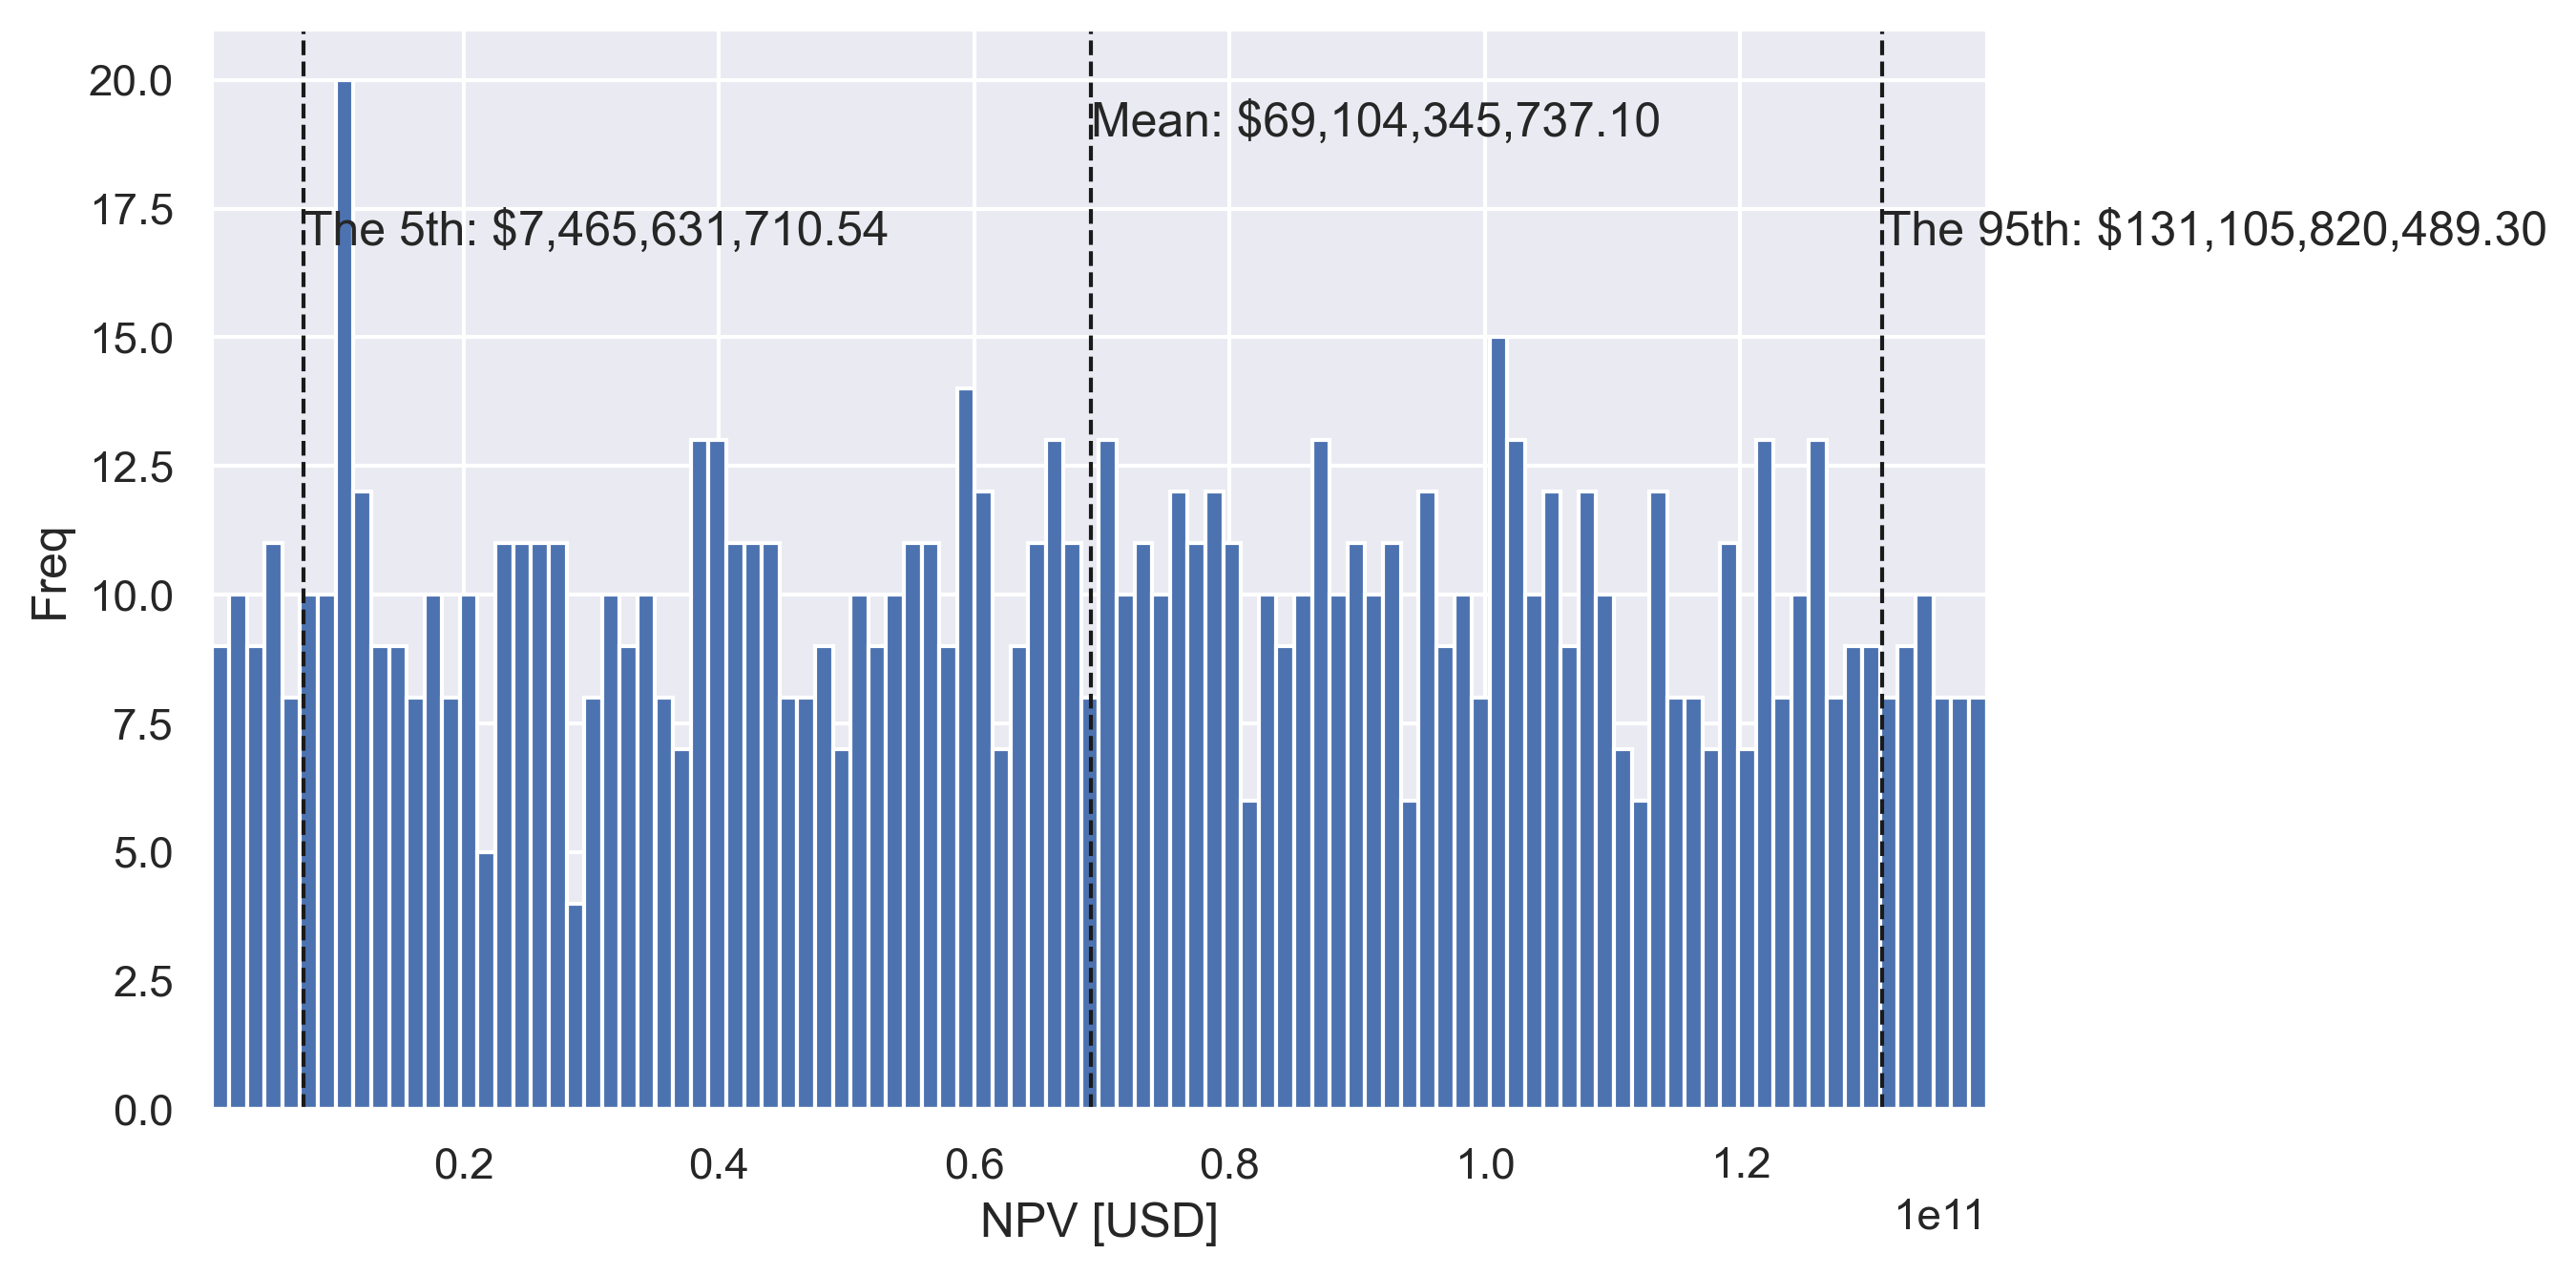

(100455024.314, 14144739671.288]        108
(69765668966.229, 83670901289.965]      106
(97576133613.7, 111481365937.435]       106
(55860436642.494, 69765668966.229]      105
(83670901289.965, 97576133613.7]        101
(14144739671.288, 28049971995.023]       94
(41955204318.758, 55860436642.494]       94
(28049971995.023, 41955204318.758]       93
(111481365937.435, 125386598261.171]     90
(125386598261.171, 139291830584.906]     90
Name: NPV, dtype: int64


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)

sns.set()

fig, ax = plt.subplots(figsize=[8,5],dpi=300)
ax.set_xlim([df_sim['NPV'].min(),df_sim['NPV'].max()])

_ = plt.hist(df_sim['NPV'], bins =100)
_ = plt.xlabel('NPV [USD]')
_ = plt.ylabel('Freq')

ze,max_y = plt.ylim()

plt.axvline(df_sim['NPV'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(df_sim['NPV'].mean(),max_y*0.9, 'Mean: ${0:,.2f}'.format(df_sim['NPV'].mean()))

plt.axvline(df_sim['NPV'].quantile(0.95), color='k', linestyle='dashed', linewidth=1)
plt.text(df_sim['NPV'].quantile(0.95),max_y*0.8, 'The 95th: ${0:,.2f}'.format(df_sim['NPV'].quantile(0.95)))

plt.axvline(df_sim['NPV'].quantile(0.05), color='k', linestyle='dashed', linewidth=1)
plt.text(df_sim['NPV'].quantile(0.05),max_y*0.8, 'The 5th: ${0:,.2f}'.format(df_sim['NPV'].quantile(0.05)))

plt.savefig('histogram_npv_sim_d.png')
plt.show()

print(df_sim['NPV'].value_counts(bins=10))

3.809434597645822e-05
[11077656.41079256]
68480744078.43954
0.00188949197342958
[1.02327126e+08]
64922001511.83444


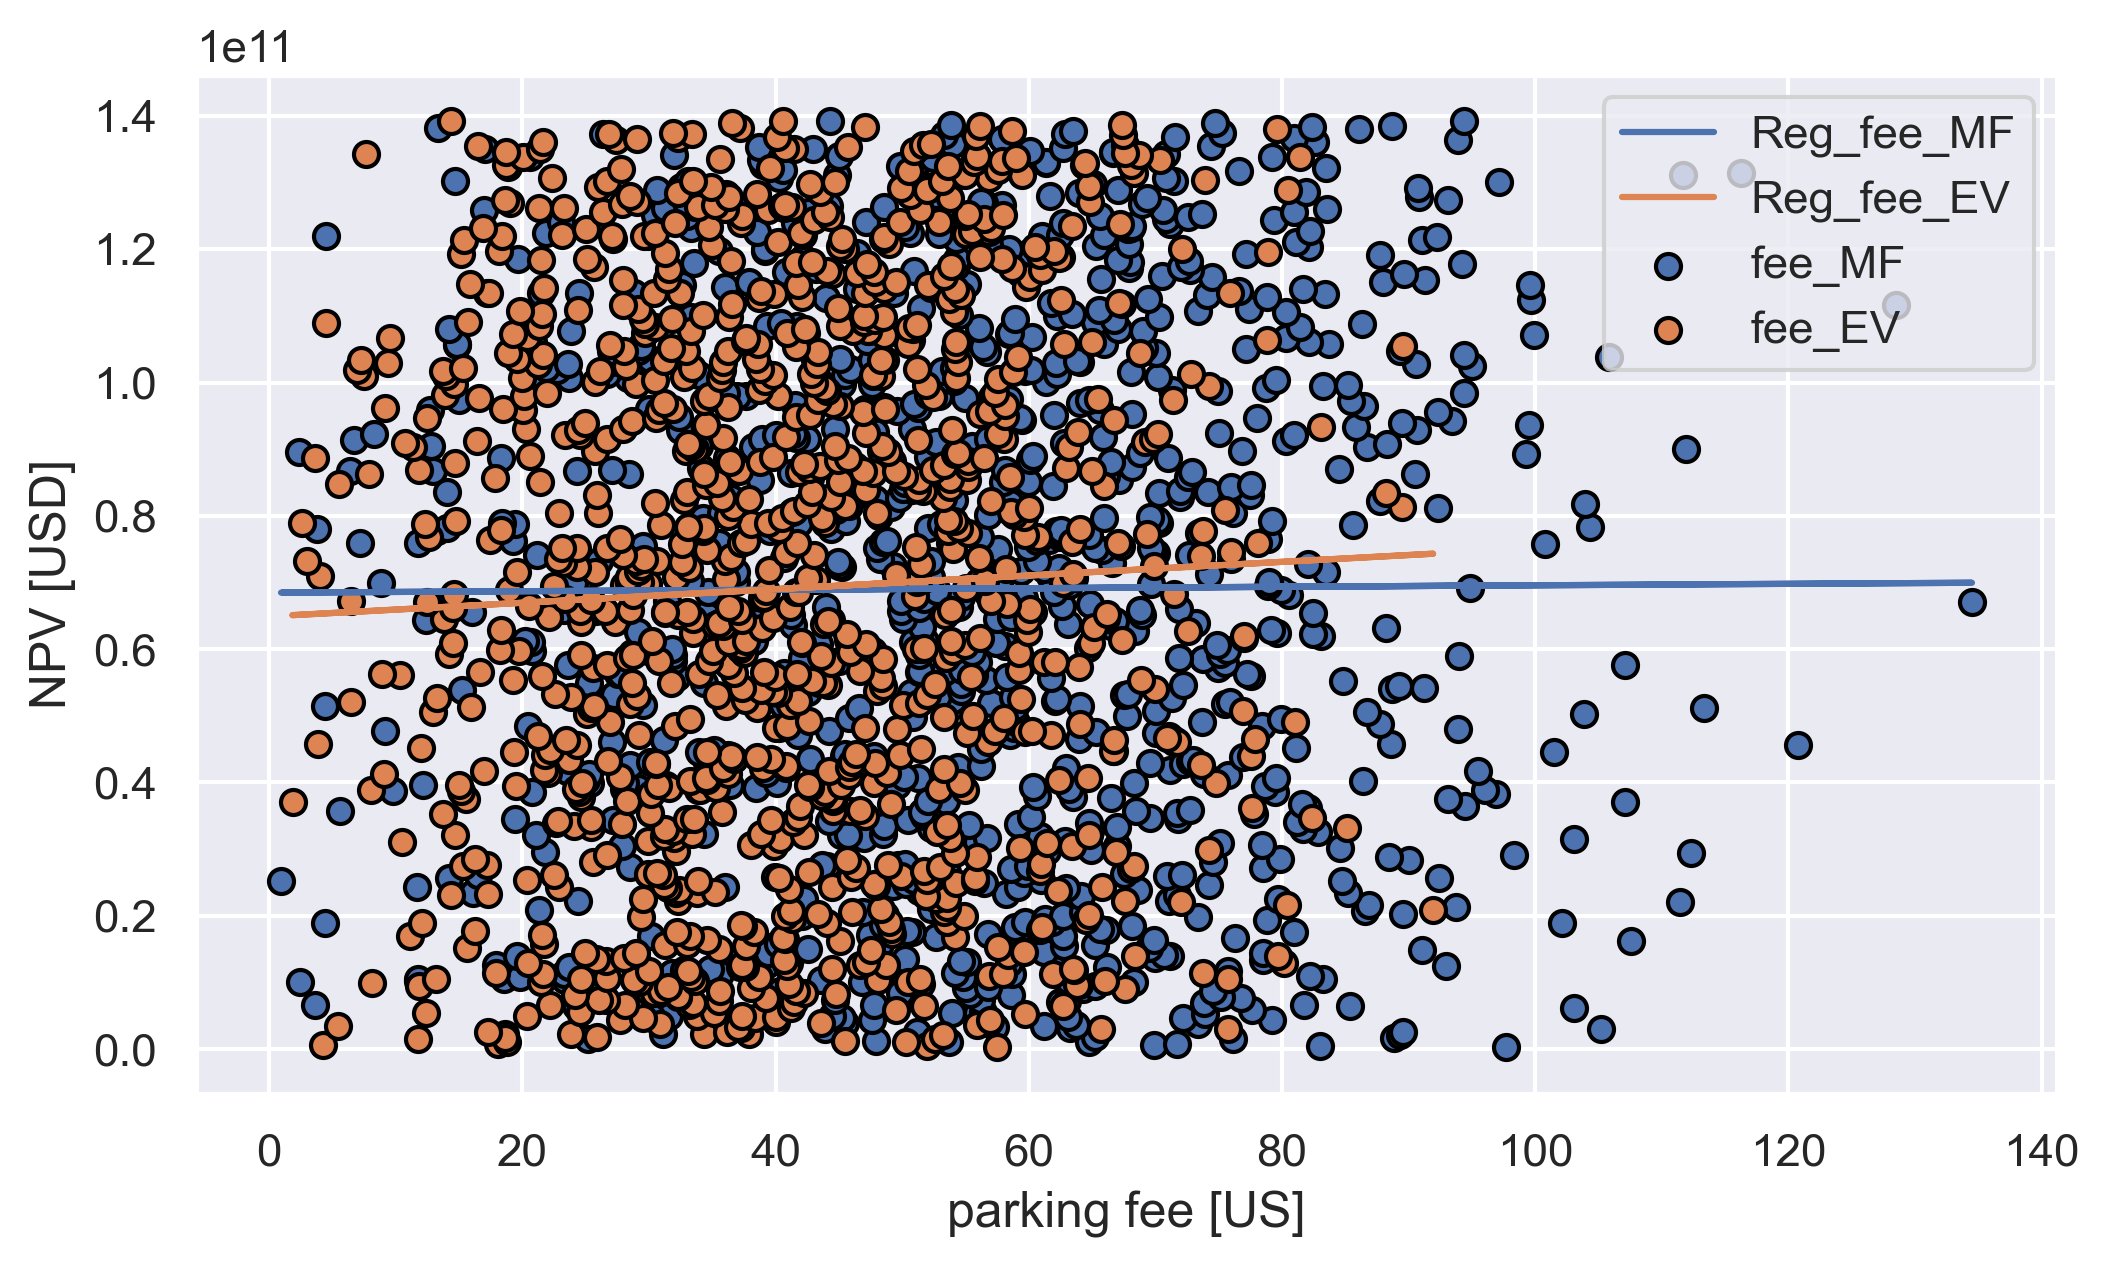

In [106]:
sns.set()

fig, ax = plt.subplots(figsize=[8,4.5],dpi=300)
#ax.set_ylim([df_sim['NPV'].min(),df_sim['NPV'].max()])

plt.scatter(df_sim['fee_MF'], df_sim['NPV'], label = "fee_MF",edgecolors='black')
plt.scatter(df_sim['fee_EV'], df_sim['NPV'], label = "fee_EV",edgecolors='black')

from sklearn.linear_model import LinearRegression
dat1 = df_sim[['fee_MF']].to_numpy()
y = df_sim['NPV'].to_numpy()
reg_MF = LinearRegression().fit(dat1, y)
print(reg_MF.score(dat1, y))
print(reg_MF.coef_)
print(reg_MF.intercept_)
plt.plot(df_sim['fee_MF'], df_sim['fee_MF']*reg_MF.coef_[0] + reg_MF.intercept_, label = "Reg_fee_MF")

dat2 = df_sim[['fee_EV']].to_numpy()
y = df_sim['NPV'].to_numpy()
reg_EV = LinearRegression().fit(dat2, y)
print(reg_EV.score(dat2, y))
print(reg_EV.coef_)
print(reg_EV.intercept_)
plt.plot(df_sim['fee_EV'], df_sim['fee_EV']*reg_EV.coef_[0] + reg_EV.intercept_, label = "Reg_fee_EV")

plt.legend()

_ = plt.xlabel('parking fee [US]')
_ = plt.ylabel('NPV [USD]')

plt.savefig('npv_fee.png')
plt.show()

In [103]:
df_sim.to_csv(r'q1d output.csv', sep=',', encoding='utf-8', header='true')